In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from we import *

# Model initiate

In [2]:
flaubert, flaubert_tokenizer, log = initiate_model()

Some weights of the model checkpoint at flaubert/flaubert_small_cased were not used when initializing FlaubertModel: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Verb analysis

In this notebook we will try to compare the word embeddings of conjugated verbs of the first group:
`manger` and `parler`. We will take present tense, future tense and passé imparfait.

Verb forms:

|    |    Parler    |  Manger |
|----------|:-------------:|------:|
|  Present| parle, parles, parlons, parlez, parlent | mange, manges, mangeons, mangez, mangent |
| Future|    parlerai, parleras, parlera, parlerons, parlerez, parleront   |  mangerai, mangeras, mangera, mangerons, mangeront |
| Imparfait | parlais, parlait, parlions, parliez, parlaient | mangeais, mangeait, mangions, mangiez, mangeaient|

Our hypothesis that if we compare verb of forms of the same tense and the same base form, the dimensions with the most changes should correspond to the gender information in WE.

We can later validate if the same dimensions get changed for both `parler` and `manger`.
    

## Present tense embeddings

In [3]:
p_pres = np.array(['parle', 'parles', 'parlons', 'parlez', 'parlent'])
m_pres = np.array(['mange', 'manges', 'mangeons', 'mangez', 'mangent'])

We can now store `parler` WE in a dataframe:

In [4]:
p_pres_df = create_words_df(flaubert, flaubert_tokenizer, p_pres)
p_pres_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
parle,-3.673823,-2.323088,1.089729,-1.591995,-2.111665,-5.017330,0.073548,1.723503,-1.698311,-1.377854,...,-1.117896,-1.717003,-2.402411,-0.056220,-0.618546,-4.898691,-5.260535,-8.738493,-1.531785,0.515756
parles,-2.197038,-4.737284,-2.455898,-1.273759,0.925364,-2.443291,-1.685714,-1.041193,-4.194215,-4.874765,...,-1.431916,-3.857271,-2.549373,2.419189,1.892127,-0.843072,-2.506565,-6.504897,-2.981026,-2.321817
parlons,-1.617677,-3.020975,1.254773,-2.420307,2.036573,-2.165560,-0.330840,2.602496,-0.141538,-1.127016,...,-0.147671,1.477918,1.183769,1.146241,0.769645,-6.815994,-3.944798,-6.275045,-4.948446,-1.388645
parlez,1.970440,1.249318,-0.604070,-3.140965,0.630521,-1.255872,-1.524006,1.093275,0.836697,-4.445086,...,1.457475,1.537194,0.636510,0.012172,1.010172,-5.047970,-4.424392,-4.275677,1.323732,-2.627632
parlent,0.092367,1.158251,2.462313,-1.259585,-3.017011,-3.631167,-0.599238,1.226797,-2.890002,2.233305,...,-1.349916,-1.093102,-1.715306,2.558887,-2.215810,-4.038155,-3.199413,-7.251254,-0.897434,2.714017


Now we can try to compare the values of dimensions of `parler`:

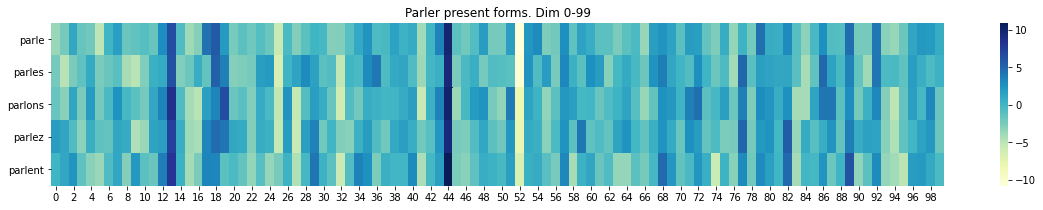

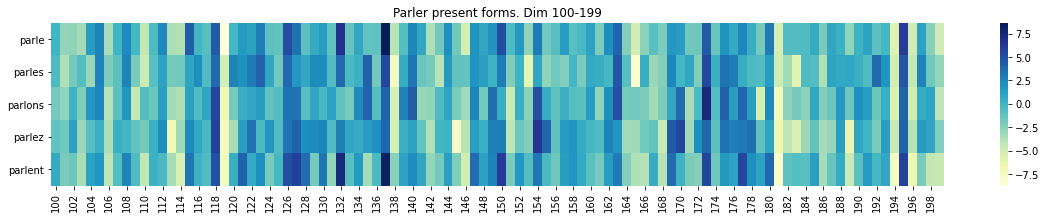

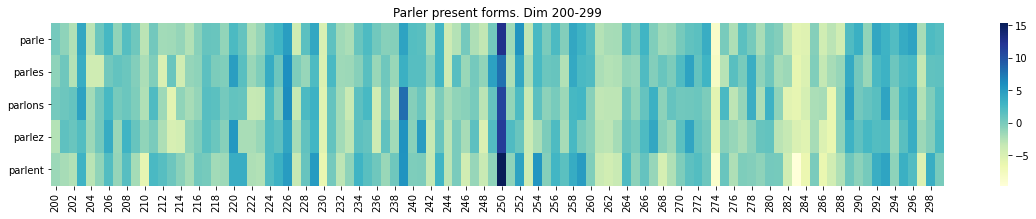

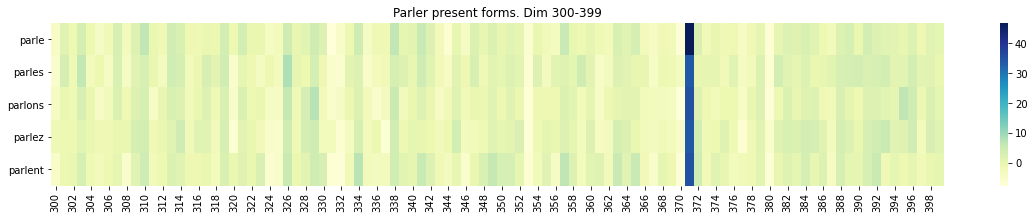

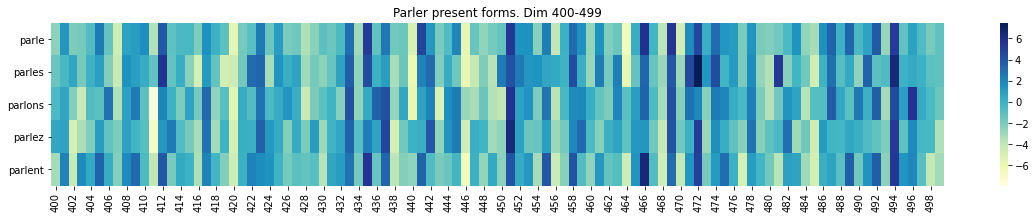

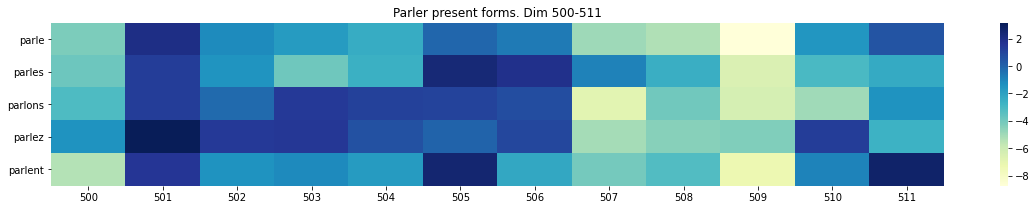

In [5]:
plot_we_heatmap(p_pres_df, label='Parler present forms')

Several dimensions stand out as having very close values for all forms, we can have a look if it's the same dimensions for `manger` forms.

Also interestingly we see a peak at dimension `371` again, as in the nouns experiment.

In [6]:
m_pres_df = create_words_df(flaubert, flaubert_tokenizer, m_pres)
m_pres_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
mange,4.626158,0.638958,0.089057,-1.398798,4.102308,-8.134293,3.795802,-6.125209,1.530610,2.689646,...,-2.811186,-1.984570,-0.653668,-0.425121,-2.639644,-4.578125,-7.143440,-3.554171,-2.642427,-1.171439
mangez,6.007986,-0.100778,-0.116287,1.680618,7.288589,-2.675406,3.177146,-1.024035,3.840911,1.584295,...,1.213078,2.539427,1.270921,1.058001,-5.553164,-4.399165,-6.568034,-2.839191,-1.574000,-2.505319
mangent,4.725202,-0.372775,1.069501,0.985752,3.759099,-5.475916,4.024258,-2.834059,3.303349,5.334762,...,-3.480505,-0.164430,-0.890098,1.890993,-1.024276,-4.070607,-8.204328,-4.279468,-2.770849,-0.698875


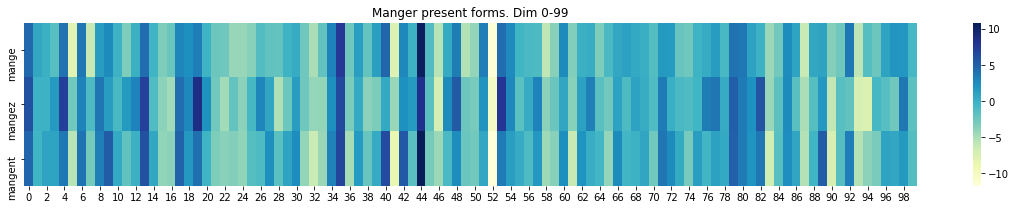

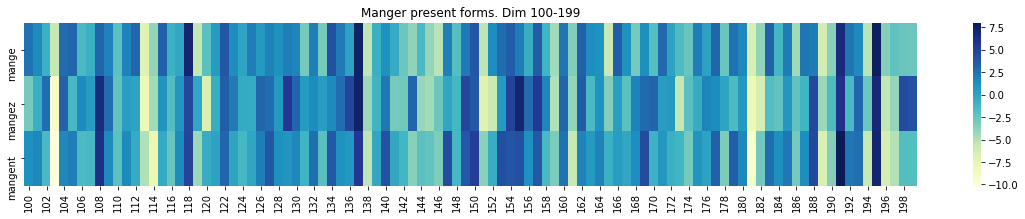

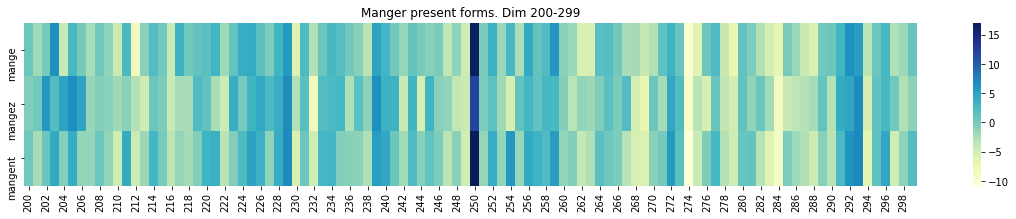

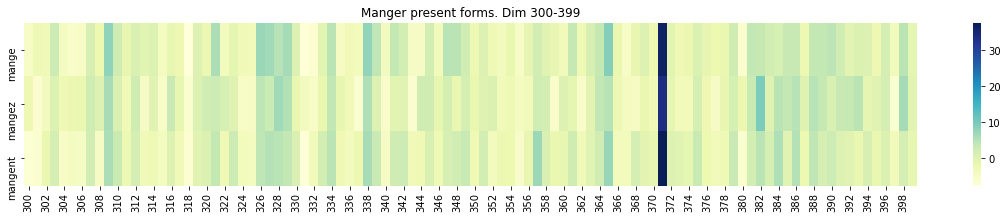

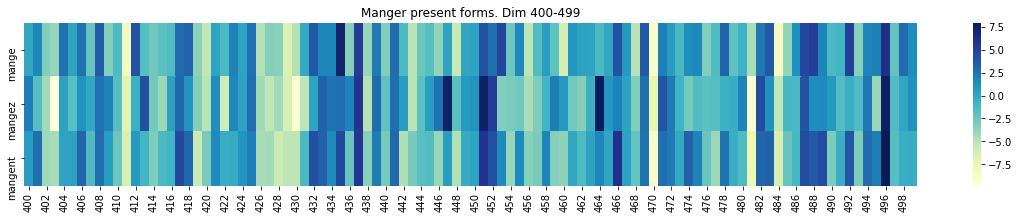

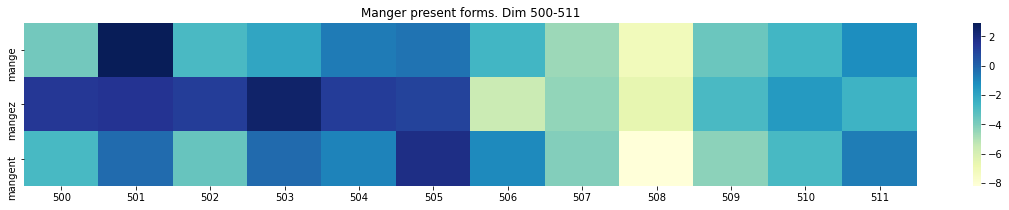

In [7]:
plot_we_heatmap(m_pres_df, label='Manger present forms')

Weirdly, we can see that for `manger` some of the forms are not found in the vocabulary like `manges` and `mangeons`. We can have a look at how these forms are tokenized:

In [8]:
f'manges tokenization: {list(map(lambda x: flaubert_tokenizer.decode(x), flaubert_tokenizer.encode("manges")))}'

"manges tokenization: ['<s>', 'man', 'ges', '</s>']"

In [9]:
f'manges tokenization: {list(map(lambda x: flaubert_tokenizer.decode(x), flaubert_tokenizer.encode("mangeons")))}'

"manges tokenization: ['<s>', 'man', 'geons', '</s>']"

# Adding future forms

We can see if adding future forms embedding shows any change in the WE patterns.

In [10]:
p_fut = np.array(['parlerai', 'parleras', 'parlera', 'parlerons', 'parlerez', 'parleront'])
m_fut = np.array(['mangerai', 'mangeras', 'mangera', 'mangerons', 'mangerez', 'mangeront'])

In [11]:
p_fut_df = create_words_df(flaubert, flaubert_tokenizer, p_fut)
p_total_df = pd.concat([p_pres_df, p_fut_df])
p_total_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
parle,-3.673823,-2.323088,1.089729,-1.591995,-2.111665,-5.017330,0.073548,1.723503,-1.698311,-1.377854,...,-1.117896,-1.717003,-2.402411,-0.056220,-0.618546,-4.898691,-5.260535,-8.738493,-1.531785,0.515756
parles,-2.197038,-4.737284,-2.455898,-1.273759,0.925364,-2.443291,-1.685714,-1.041193,-4.194215,-4.874765,...,-1.431916,-3.857271,-2.549373,2.419189,1.892127,-0.843072,-2.506565,-6.504897,-2.981026,-2.321817
parlons,-1.617677,-3.020975,1.254773,-2.420307,2.036573,-2.165560,-0.330840,2.602496,-0.141538,-1.127016,...,-0.147671,1.477918,1.183769,1.146241,0.769645,-6.815994,-3.944798,-6.275045,-4.948446,-1.388645
parlez,1.970440,1.249318,-0.604070,-3.140965,0.630521,-1.255872,-1.524006,1.093275,0.836697,-4.445086,...,1.457475,1.537194,0.636510,0.012172,1.010172,-5.047970,-4.424392,-4.275677,1.323732,-2.627632
parlent,0.092367,1.158251,2.462313,-1.259585,-3.017011,-3.631167,-0.599238,1.226797,-2.890002,2.233305,...,-1.349916,-1.093102,-1.715306,2.558887,-2.215810,-4.038155,-3.199413,-7.251254,-0.897434,2.714017
parlerai,-1.797068,-3.294924,-3.212430,1.958420,0.978222,-0.853256,-1.301992,-2.601207,3.477857,-4.827620,...,-0.287826,-0.885035,-1.859827,-3.836035,2.418204,-7.150464,-6.451215,-5.281724,0.155713,-0.434933
parlera,-3.396622,-4.423192,-0.640939,2.115278,-1.504028,-0.044054,1.781720,3.035324,3.133817,-3.175372,...,-1.546068,0.297250,-5.646190,-1.517386,1.682694,-3.994848,-5.811861,-7.577753,-2.081724,-2.901936
parlerons,0.769186,-3.437772,0.186175,2.331927,2.131199,-1.814185,0.768879,1.607344,3.214424,-3.392639,...,-0.055403,-0.426407,-1.460487,-3.104220,1.881971,-5.298823,-5.802782,-7.746711,-0.977322,-0.822361


Once again some forms seem to have no embedding of their own.

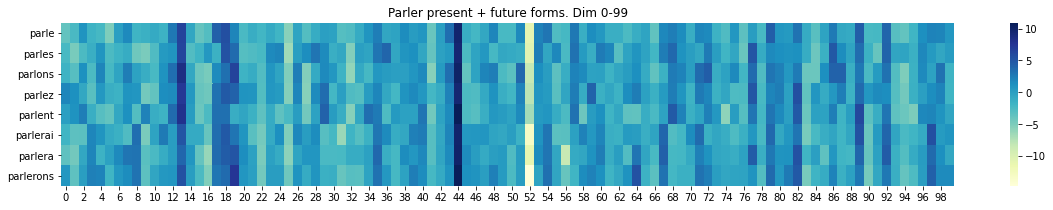

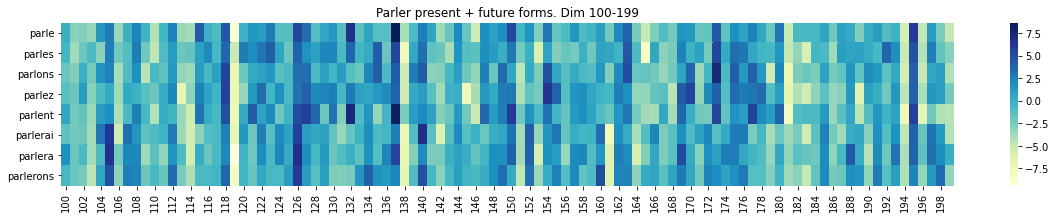

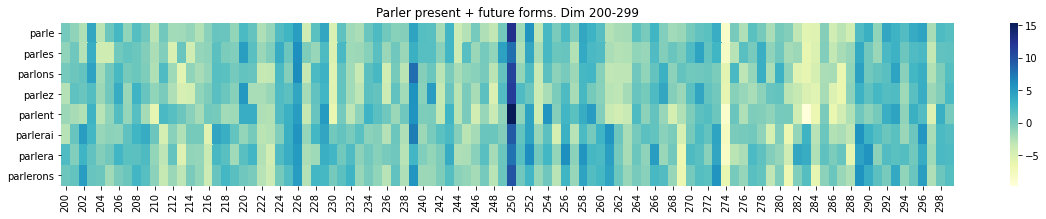

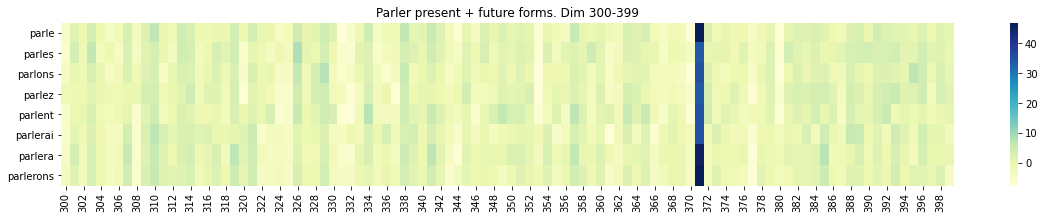

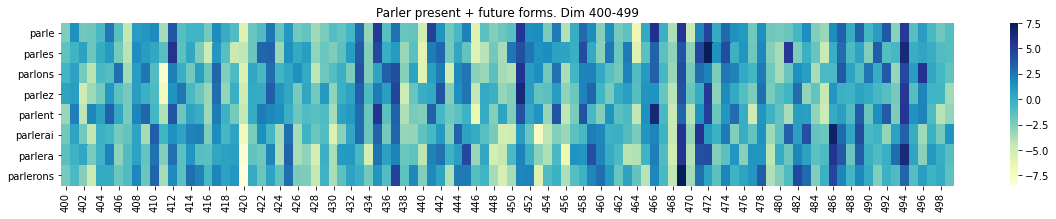

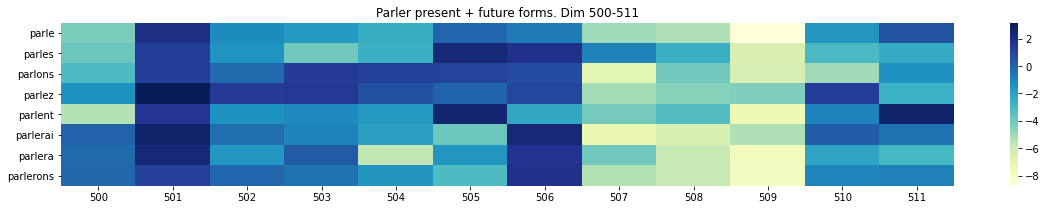

In [12]:
plot_we_heatmap(p_total_df, 'Parler present + future forms')

Visually, the values of dimensions `161` and `283` (as well as some others with a bit less prominent difference) seem to have the biggest difference between forms of present and future of `parler`. We can have a look if the same for `manger`.

In [13]:
m_fut_df = create_words_df(flaubert, flaubert_tokenizer, m_fut)
m_total_df = pd.concat([m_pres_df, m_fut_df])
m_total_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
mange,4.626158,0.638958,0.089057,-1.398798,4.102308,-8.134293,3.795802,-6.125209,1.530610,2.689646,...,-2.811186,-1.984570,-0.653668,-0.425121,-2.639644,-4.578125,-7.143440,-3.554171,-2.642427,-1.171439
mangez,6.007986,-0.100778,-0.116287,1.680618,7.288589,-2.675406,3.177146,-1.024035,3.840911,1.584295,...,1.213078,2.539427,1.270921,1.058001,-5.553164,-4.399165,-6.568034,-2.839191,-1.574000,-2.505319
mangent,4.725202,-0.372775,1.069501,0.985752,3.759099,-5.475916,4.024258,-2.834059,3.303349,5.334762,...,-3.480505,-0.164430,-0.890098,1.890993,-1.024276,-4.070607,-8.204328,-4.279468,-2.770849,-0.698875


However, it seems like there are no forms of future tense of `manger` that have their own WE `¯\_(ツ)_/¯`.

# Adding imparfait forms

In [14]:
p_imp = np.array(['parlais', 'parlait', 'parlions', 'parliez', 'parlaient'])
m_imp = np.array(['mangeais', 'mangeait', 'mangions', 'mangiez', 'mangeaent'])

In [15]:
p_imp_df = create_words_df(flaubert, flaubert_tokenizer, p_imp)
p_total_df = pd.concat([p_total_df, p_imp_df])
p_total_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
parle,-3.673823,-2.323088,1.089729,-1.591995,-2.111665,-5.017330,0.073548,1.723503,-1.698311,-1.377854,...,-1.117896,-1.717003,-2.402411,-0.056220,-0.618546,-4.898691,-5.260535,-8.738493,-1.531785,0.515756
parles,-2.197038,-4.737284,-2.455898,-1.273759,0.925364,-2.443291,-1.685714,-1.041193,-4.194215,-4.874765,...,-1.431916,-3.857271,-2.549373,2.419189,1.892127,-0.843072,-2.506565,-6.504897,-2.981026,-2.321817
parlons,-1.617677,-3.020975,1.254773,-2.420307,2.036573,-2.165560,-0.330840,2.602496,-0.141538,-1.127016,...,-0.147671,1.477918,1.183769,1.146241,0.769645,-6.815994,-3.944798,-6.275045,-4.948446,-1.388645
parlez,1.970440,1.249318,-0.604070,-3.140965,0.630521,-1.255872,-1.524006,1.093275,0.836697,-4.445086,...,1.457475,1.537194,0.636510,0.012172,1.010172,-5.047970,-4.424392,-4.275677,1.323732,-2.627632
parlent,0.092367,1.158251,2.462313,-1.259585,-3.017011,-3.631167,-0.599238,1.226797,-2.890002,2.233305,...,-1.349916,-1.093102,-1.715306,2.558887,-2.215810,-4.038155,-3.199413,-7.251254,-0.897434,2.714017
parlerai,-1.797068,-3.294924,-3.212430,1.958420,0.978222,-0.853256,-1.301992,-2.601207,3.477857,-4.827620,...,-0.287826,-0.885035,-1.859827,-3.836035,2.418204,-7.150464,-6.451215,-5.281724,0.155713,-0.434933
parlera,-3.396622,-4.423192,-0.640939,2.115278,-1.504028,-0.044054,1.781720,3.035324,3.133817,-3.175372,...,-1.546068,0.297250,-5.646190,-1.517386,1.682694,-3.994848,-5.811861,-7.577753,-2.081724,-2.901936
parlerons,0.769186,-3.437772,0.186175,2.331927,2.131199,-1.814185,0.768879,1.607344,3.214424,-3.392639,...,-0.055403,-0.426407,-1.460487,-3.104220,1.881971,-5.298823,-5.802782,-7.746711,-0.977322,-0.822361
parlais,-1.078568,0.309260,-0.594994,-0.551821,-1.529874,-3.915206,-3.797300,-1.353526,-2.000501,-1.667598,...,-1.077244,4.068207,-0.256286,-2.688269,1.277292,-4.986499,-5.658338,-6.710426,-1.746348,-0.736220
parlait,-1.873502,0.842532,2.896719,4.086721,-3.212495,-3.727929,-0.561341,1.872829,-2.722504,1.000849,...,-1.551023,2.319752,-4.330720,1.135701,-1.430706,-0.869468,-3.206942,-6.023154,-1.394446,0.191015


We can have a look if dimensions `161` and `283` have any difference between future and imparfait forms:

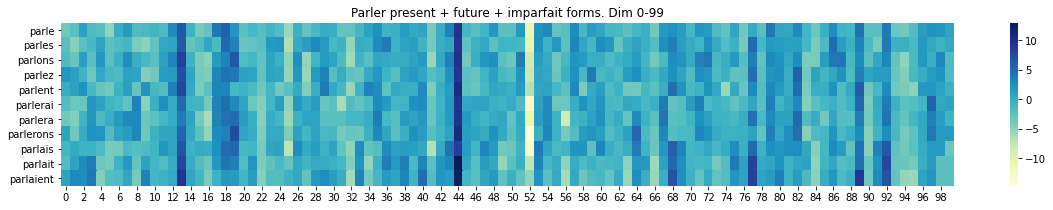

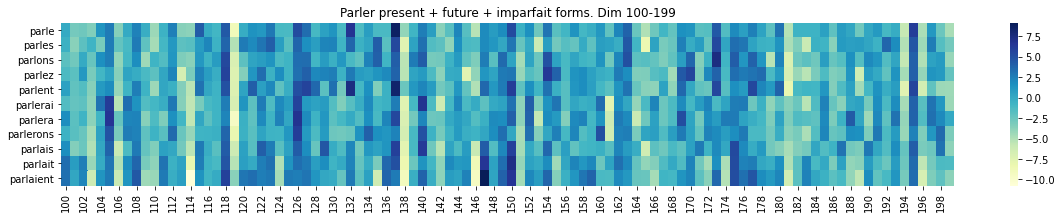

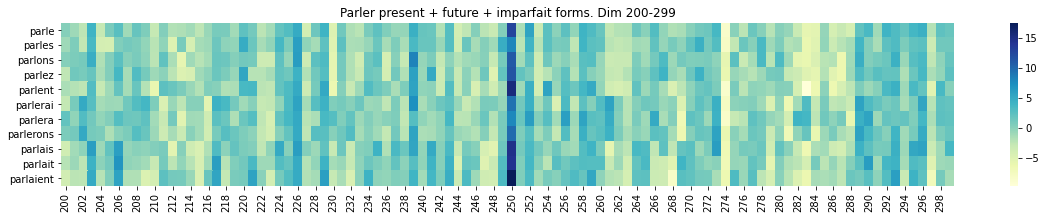

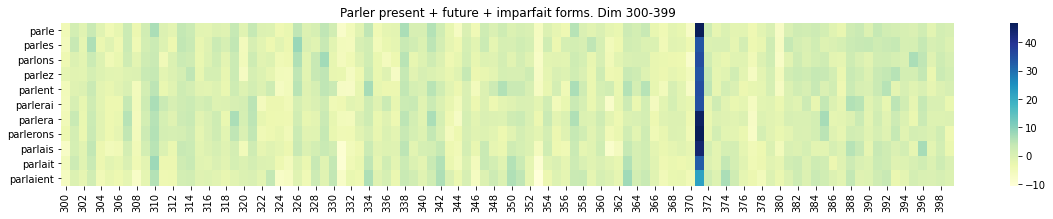

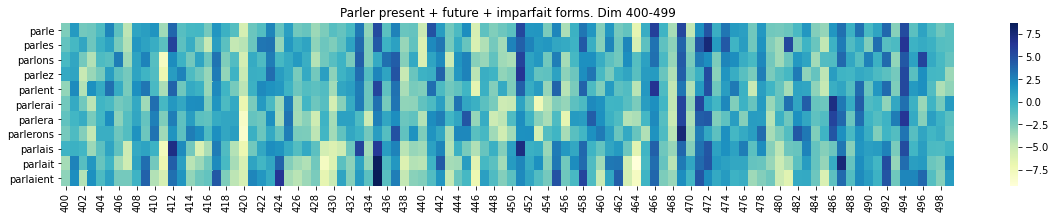

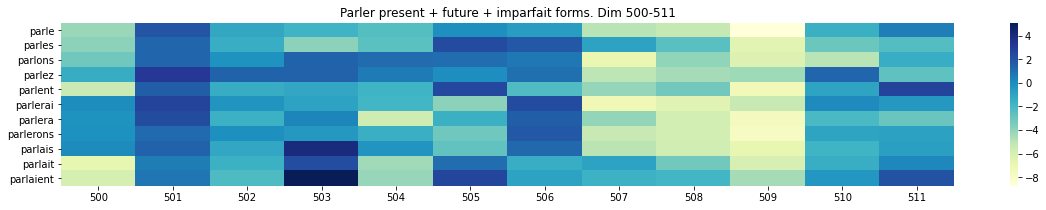

In [16]:
plot_we_heatmap(p_total_df, 'Parler present + future + imparfait forms')

Yes, indeed the values of dimensions `161` and `283` still stand out for future forms. It also got more noticable that the values of dimensions `68` and `69` are very close for future forms in comparison to other forms. It is also noticable that there are some dimensions where values of imparfait forms stand out, like dimensions `146` and `503`.

We can now have a look if this tendency is reproducible with irregular verb like `aller`.

# Aller forms

In [17]:
a_pres = np.array(['vais', 'vas', 'va', 'allons', 'allez', 'vont'])
a_fut = np.array(['irai', 'iras', 'ira', 'irons', 'irez', 'iront'])
a_imp = np.array(['allais', 'allait', 'allions', 'alliez', 'allaient'])

In [18]:
a_df = create_words_df(flaubert, flaubert_tokenizer, np.concatenate([a_pres, a_fut, a_imp]))
a_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
vais,-0.103323,-0.211723,-2.451134,-3.111913,2.518698,-6.252023,-2.529228,-5.811940,-3.419910,0.492869,...,-0.980656,1.505035,2.561039,-4.862210,0.314324,-3.459311,-5.082567,-2.888560,-0.549511,0.735295
vas,0.325772,-5.266384,-3.911935,-3.848186,3.471087,-6.940234,-3.359889,-3.447052,-1.686027,0.863747,...,3.189440,-0.011088,1.016583,-4.961668,2.719842,-4.118058,-1.145622,-5.459587,-2.009444,-1.495389
va,-0.954710,-4.190552,-1.889079,-2.415642,0.054728,-4.606611,-1.599833,-0.068636,-1.656199,1.551630,...,3.000684,1.834455,-1.284578,-4.895809,0.332412,-5.731951,-4.118734,-8.908072,-1.487863,-2.664484
allons,1.431181,-6.004001,1.217807,-2.082723,5.243579,-4.013796,-1.739589,-2.021975,-0.474287,0.693908,...,1.254982,0.681599,0.724730,-4.843237,3.081729,-6.864636,-5.686759,-4.791181,-3.126466,-1.033088
allez,5.465843,-2.533766,-0.848924,-2.314771,2.604584,-2.535630,-3.433530,2.320512,-1.175871,-0.801140,...,3.385844,2.531611,1.939948,-3.097255,0.843753,-4.215022,-2.122531,-3.675985,0.884254,-5.404068
vont,0.164575,-1.836109,-1.155827,-3.642013,0.535974,-5.858943,-3.483626,-1.294981,-1.282752,4.252595,...,1.821634,0.365136,-1.608676,-4.229060,2.547178,-6.239842,-4.139445,-7.308372,-2.806313,-1.321052
irai,-1.546999,-2.171067,-3.620035,-1.275154,2.219709,-4.270725,-0.767805,-5.063594,-1.405783,-3.143706,...,-0.016419,0.261284,-1.675970,-6.073526,1.945523,-3.453492,-4.561720,-1.926780,0.569671,1.319281
ira,-1.655518,-7.464219,-4.100709,-2.443353,1.204877,-2.680277,0.246986,-1.250822,3.740371,-0.863255,...,0.179902,4.191129,-3.109775,-8.382214,-1.064473,-7.274391,-3.279597,-5.015614,-2.487163,1.060670
irons,1.132853,-3.883171,-0.690608,-1.280904,6.769824,-0.949136,2.013860,-2.606463,0.997104,-1.085836,...,1.370426,-0.895340,-2.859610,-5.863559,2.180041,-4.359388,-2.555744,-4.784312,-1.037260,-0.235147
irez,0.651752,-2.823819,-2.886664,0.671028,5.613553,1.259795,0.614822,-2.841112,1.256767,-2.893388,...,1.099340,-0.799220,-1.532809,-2.442944,-0.985357,-3.685221,-2.530168,-0.090266,1.279072,-1.353233


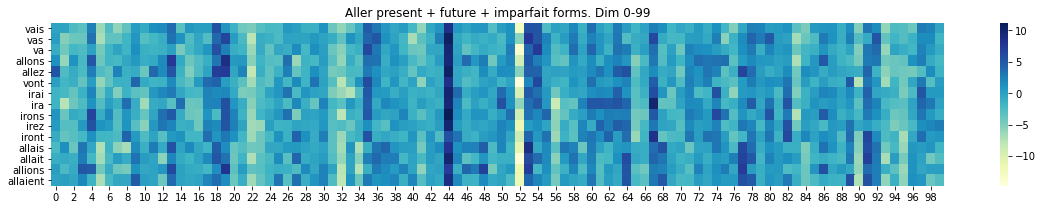

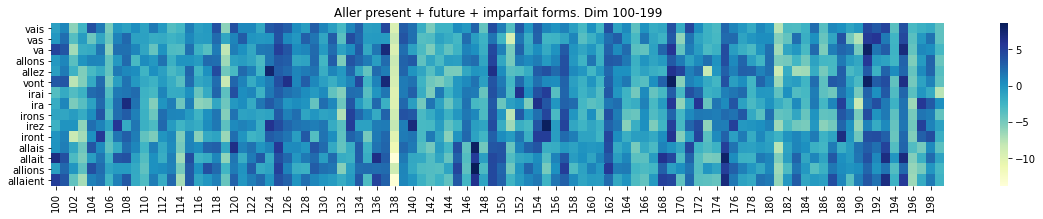

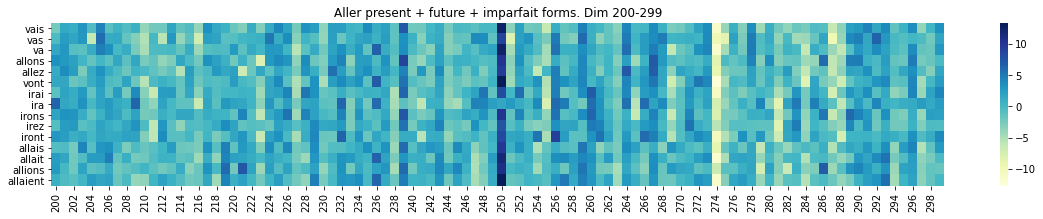

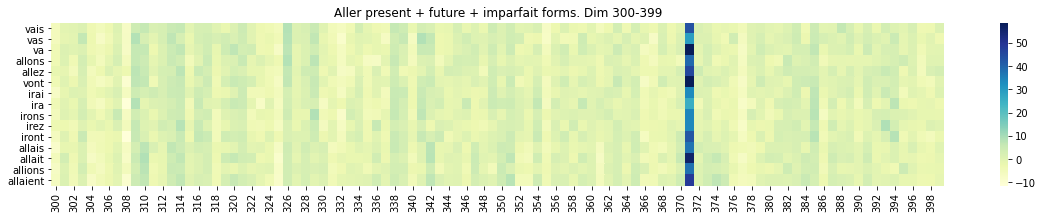

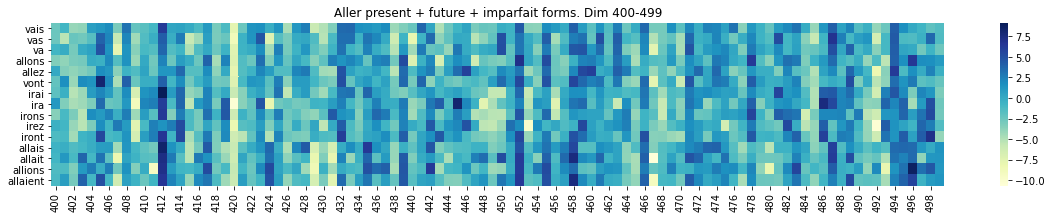

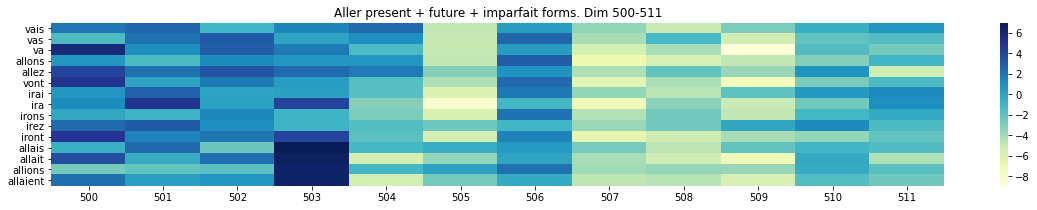

In [19]:
plot_we_heatmap(a_df, 'Aller present + future + imparfait forms')

We can see only slight difference in the values of parameters of dimensions `161` and `283` for `aller`, however, for imparfait dimensions `146` and `503` still standout the same. We may link it to the way these forms are using infinitif, similar to regular nous, hence the same dimensions are activated.

Interestingly, for the future tense of `aller` dimension `409` stands out more than it did for `parler` which can be a signifier of a future tense as well.